In [1]:
import pandas as pd
from tabulate import tabulate
from src.datasets import camvid
from src import evaluate
from src import plot
from src import predict
from src import predict_video
from src.tiramisu import epi_approx_tiramisu
%matplotlib inline

Using TensorFlow backend.


In [2]:
# the location to save fine training weights to
weights_file = 'models/Tiramisu103-CamVid11-fine.h5'

In [3]:
# the size to crop images to for fine tune training
crop_size = (352, 480)

In [4]:
camvid11 = camvid.CamVid(
    mapping=camvid.CamVid.load_mapping(),
    target_size=(360, 480),
    crop_size=crop_size,
    horizontal_flip=True,
    ignored_labels=['Void'],
)
generators = camvid11.generators()

Found 233 images belonging to 1 classes.
Found 233 images belonging to 1 classes.
Found 367 images belonging to 1 classes.
Found 367 images belonging to 1 classes.
Found 101 images belonging to 1 classes.
Found 101 images belonging to 1 classes.


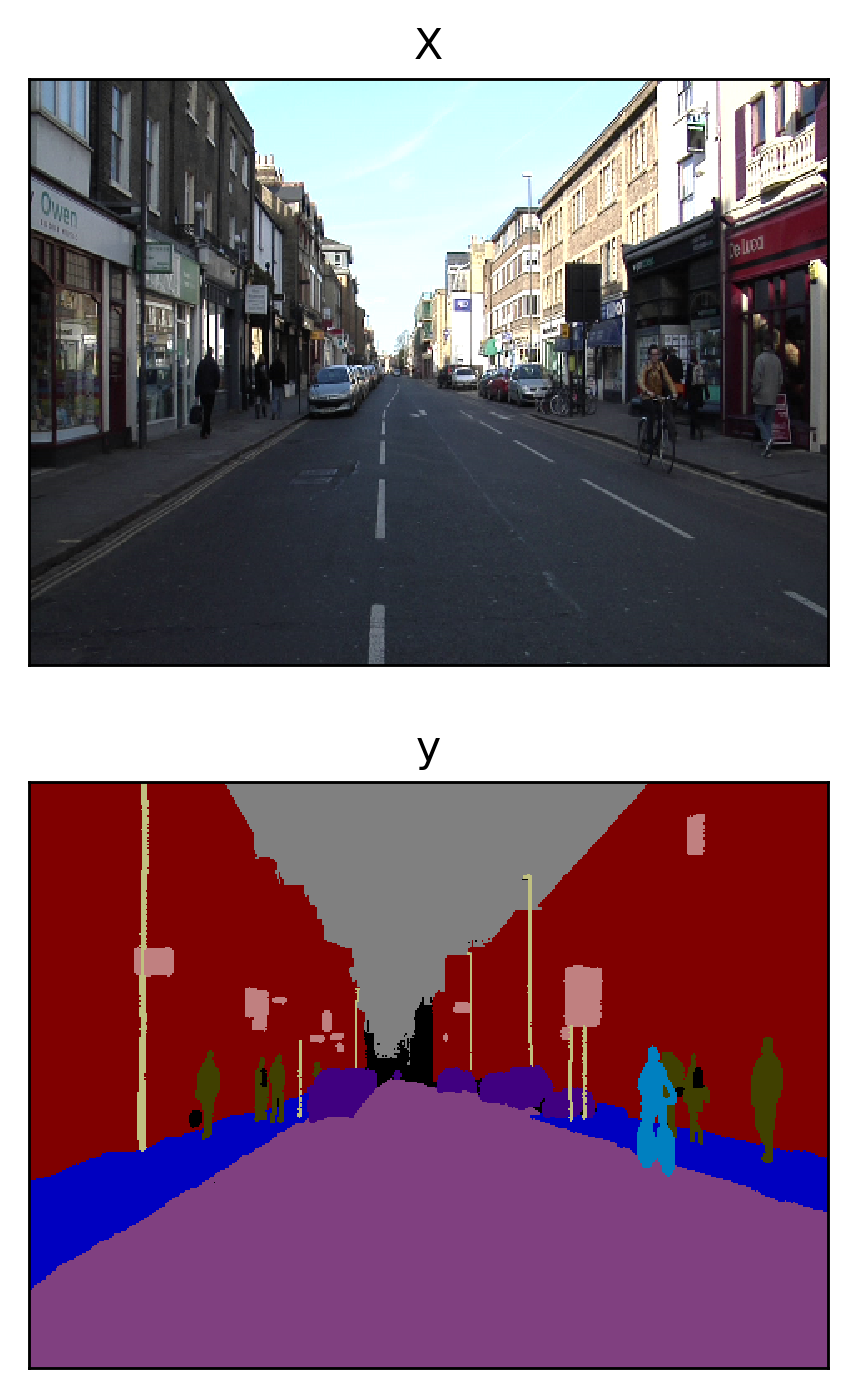

In [5]:
# get the next X, y training tuple
X, y = next(generators['train'])
# transform the onehot vector to an image
y = camvid11.unmap(y)
# plot the images
_ = plot.plot(X=X[0], y=y[0], order=['X', 'y'])

In [6]:
# build the model for the image shape and number of labels
model = epi_approx_tiramisu.epi_approx_tiramisu((*crop_size, 3), camvid11.n, class_weights=camvid11.class_mask)
model.layers[1].load_weights(weights_file)
model.summary()

/home/bitcommander/Documents/Projects/neural-semantic-segmentation/src/tiramisu/epi_approx_tiramisu.py:72: UserWarning: Output "entropy" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "entropy" during training.
  metrics={'tiramisu': [build_categorical_accuracy(weights=class_weights)]},


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 352, 480, 3)       0         
_________________________________________________________________
tiramisu (Model)             (None, 352, 480, 12)      9423116   
_________________________________________________________________
moving_average_1 (MovingAver (None, 352, 480, 12)      0         
_________________________________________________________________
entropy (Entropy)            (None, 352, 480)          0         
Total params: 9,423,116
Trainable params: 9,320,044
Non-trainable params: 103,072
_________________________________________________________________


# Test Metrics

In [7]:
metrics = evaluate.evaluate(model, generators['test'], 233,
    mask=camvid11.class_mask, 
    code_map=camvid11.discrete_to_label_map,
)
metrics

100%|██████████| 233/233 [01:26<00:00,  2.70step/s]


Value
Accuracy                 0.895516
Mean Per Class Accuracy  0.697066
Mean I/U                 0.546181
Bicyclist                0.212559
Building                 0.758423
Car                      0.615203
Column_Pole              0.318969
Fence                    0.162449
Pedestrian               0.374720
Road                     0.910431
Sidewalk                 0.801581
SignSymbol               0.235152
Sky                      0.915972
VegetationMisc           0.702534

In [8]:
print(tabulate(metrics, tablefmt='pipe', headers=('Metric', 'Value')))

| Metric                  |    Value |
|:------------------------|---------:|
| Accuracy                | 0.895516 |
| Mean Per Class Accuracy | 0.697066 |
| Mean I/U                | 0.546181 |
| Bicyclist               | 0.212559 |
| Building                | 0.758423 |
| Car                     | 0.615203 |
| Column_Pole             | 0.318969 |
| Fence                   | 0.162449 |
| Pedestrian              | 0.37472  |
| Road                    | 0.910431 |
| Sidewalk                | 0.801581 |
| SignSymbol              | 0.235152 |
| Sky                     | 0.915972 |
| VegetationMisc          | 0.702534 |


# Qualitative Results

## Train

In [9]:
X, y, p, s = predict.predict_epistemic(model, generators['train'], camvid11)

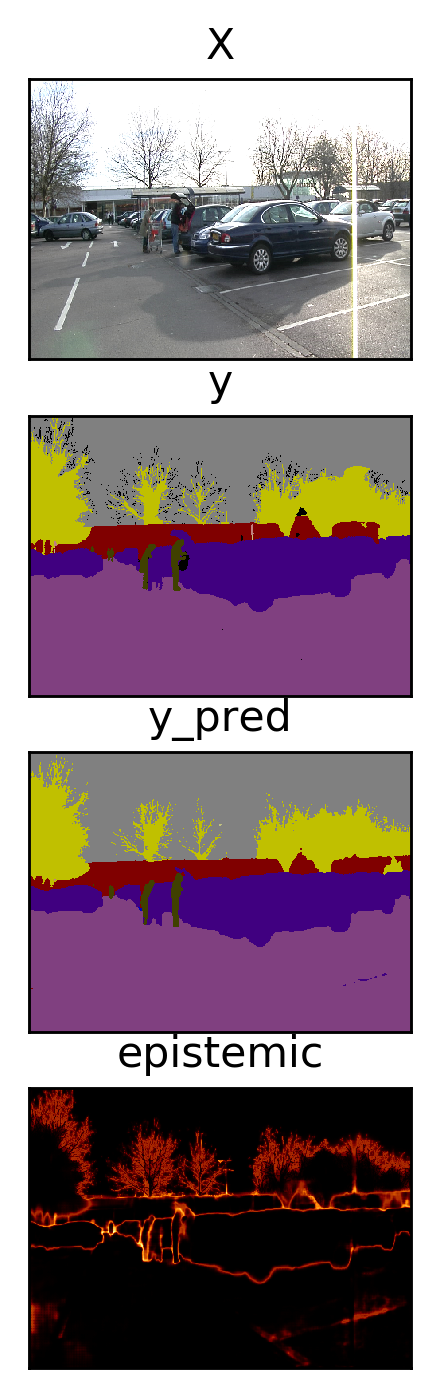

In [10]:
_ = plot.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

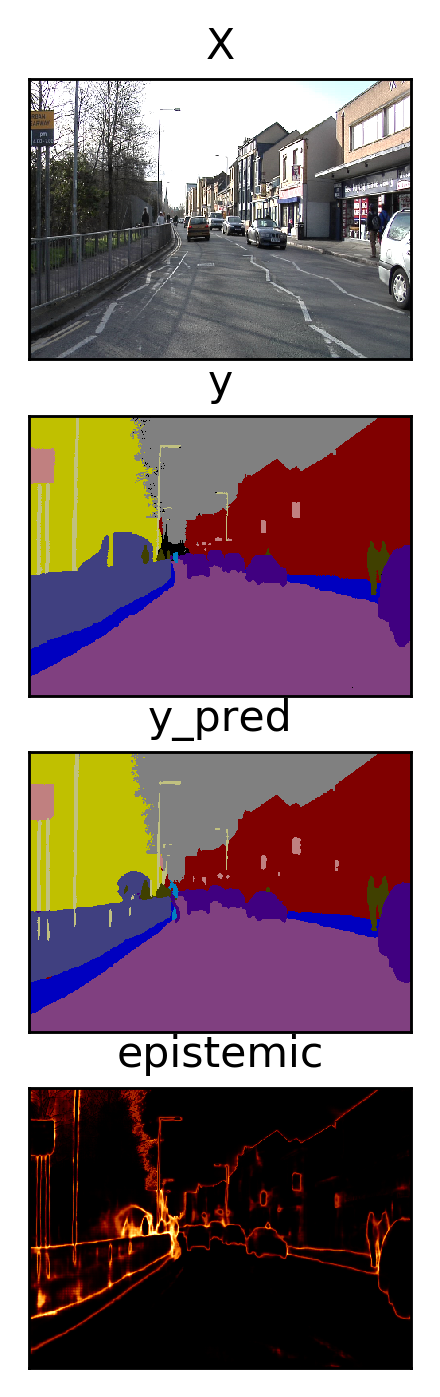

In [11]:
_ = plot.plot(X=X[1], y=y[1], y_pred=p[1], epistemic=s[1], order=['X', 'y', 'y_pred', 'epistemic'])

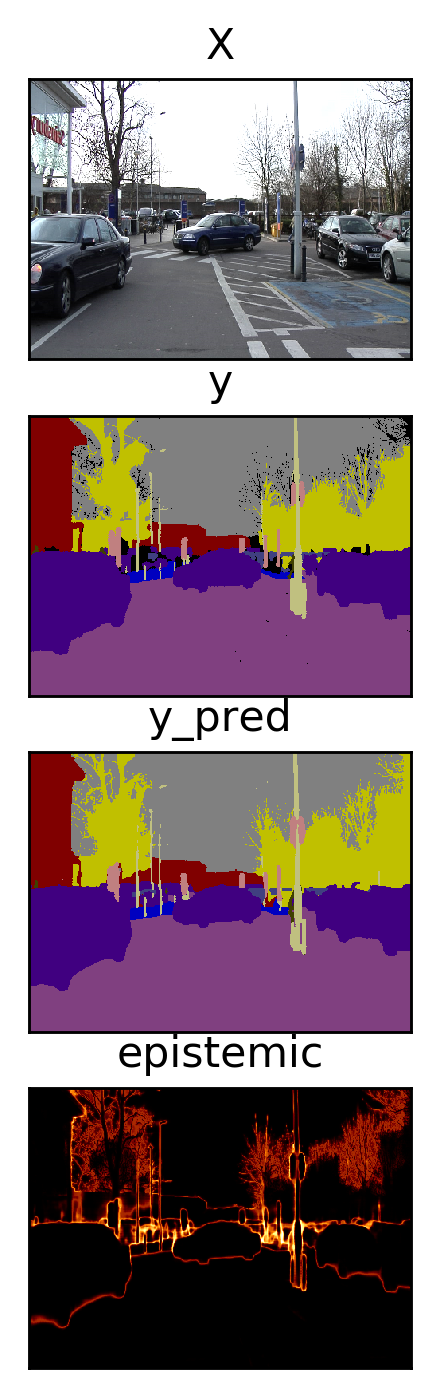

In [12]:
_ = plot.plot(X=X[2], y=y[2], y_pred=p[2], epistemic=s[2], order=['X', 'y', 'y_pred', 'epistemic'])

## Validation

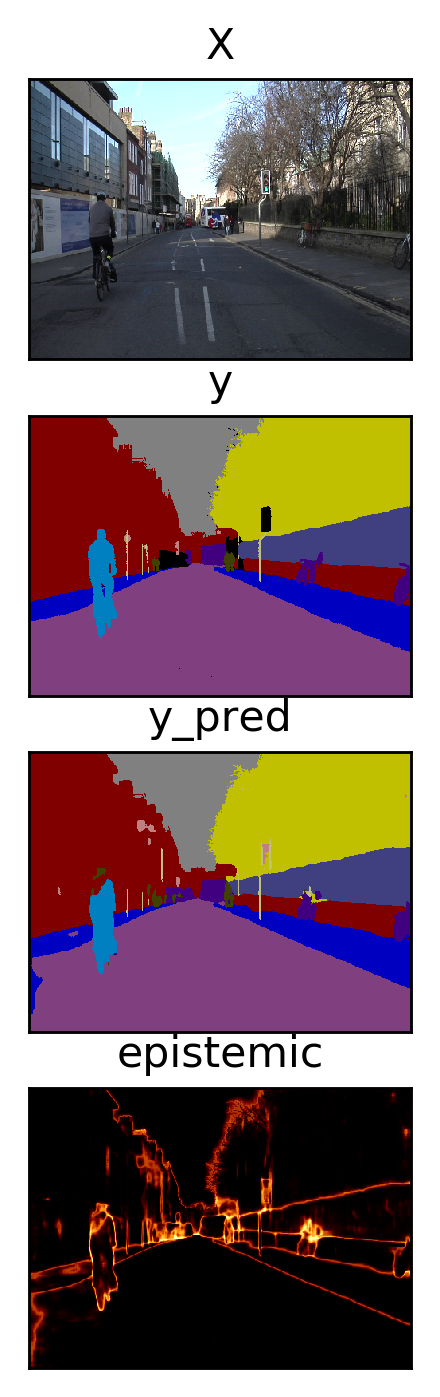

In [13]:
X, y, p, s = predict.predict_epistemic(model, generators['val'], camvid11)
_ = plot.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

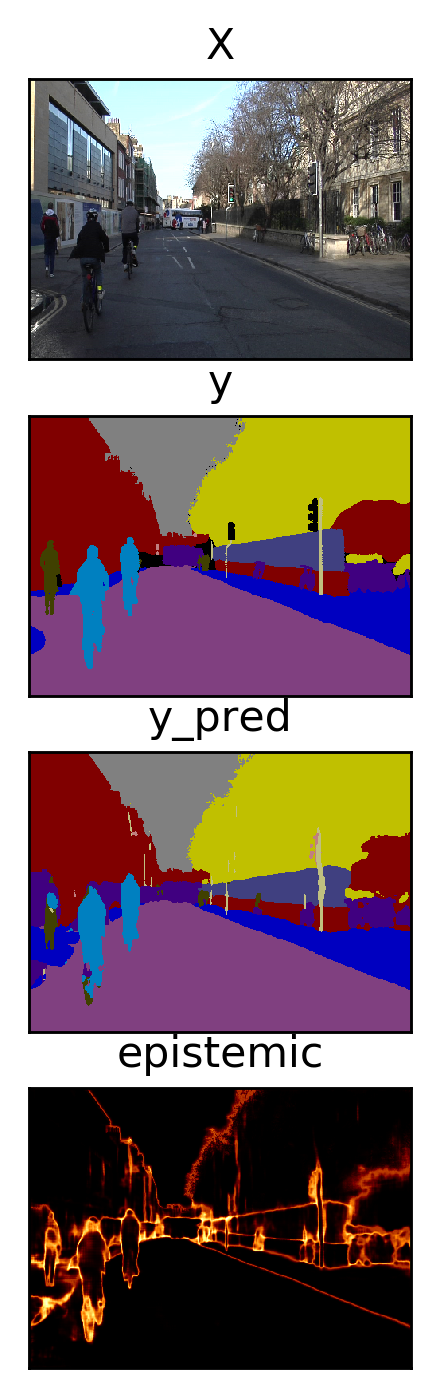

In [14]:
X, y, p, s = predict.predict_epistemic(model, generators['val'], camvid11)
_ = plot.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

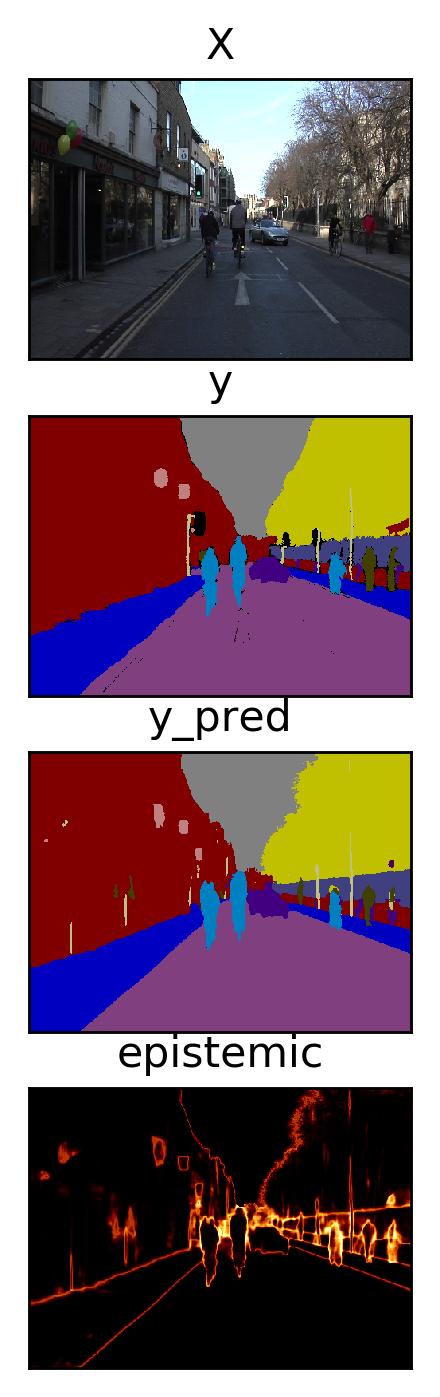

In [15]:
X, y, p, s = predict.predict_epistemic(model, generators['val'], camvid11)
_ = plot.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

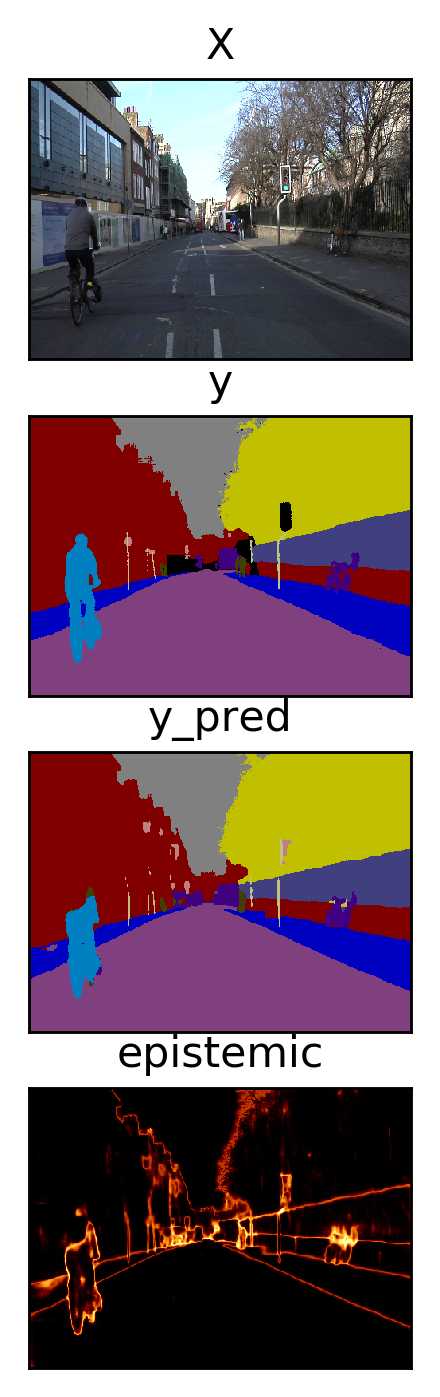

In [16]:
X, y, p, s = predict.predict_epistemic(model, generators['val'], camvid11)
_ = plot.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

## Test

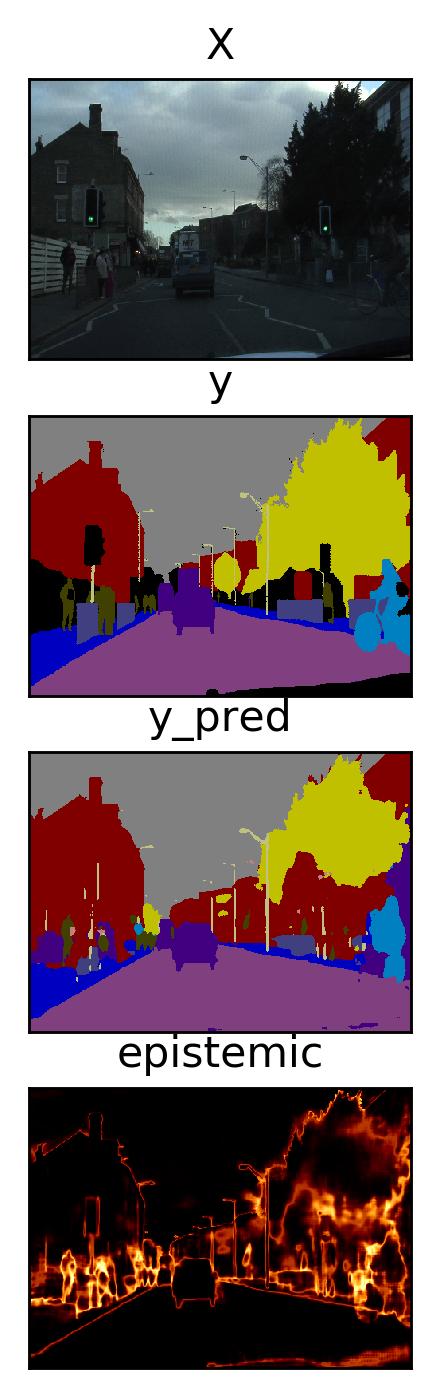

In [17]:
X, y, p, s = predict.predict_epistemic(model, generators['test'], camvid11)
fig = plot.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])
fig.savefig('img/tiramisu-bayesian/epistemic-approx/0.png', transparent=True, bbox_inches='tight')

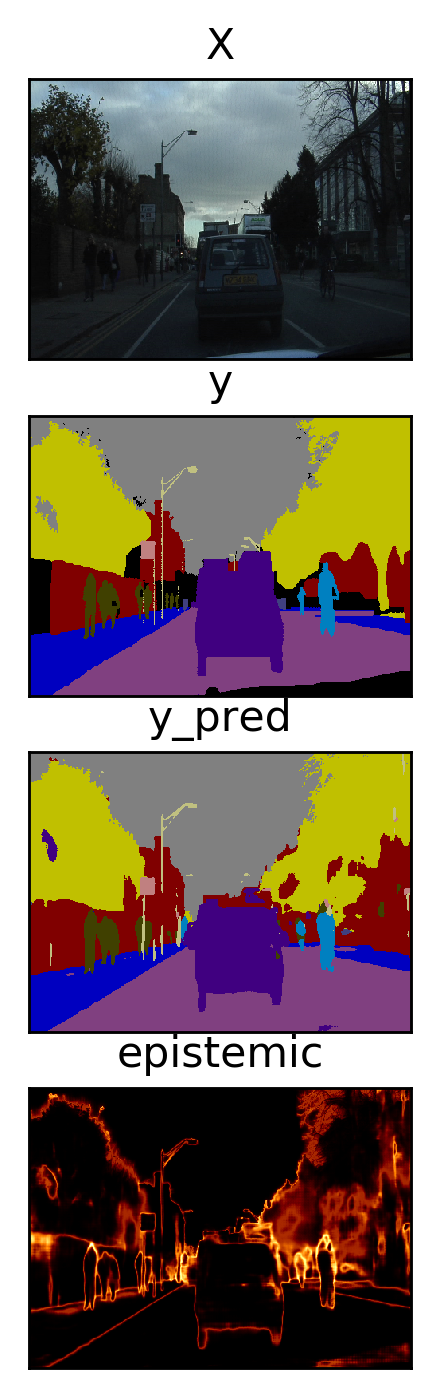

In [18]:
X, y, p, s = predict.predict_epistemic(model, generators['test'], camvid11)
fig = plot.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])
fig.savefig('img/tiramisu-bayesian/epistemic-approx/1.png', transparent=True, bbox_inches='tight')

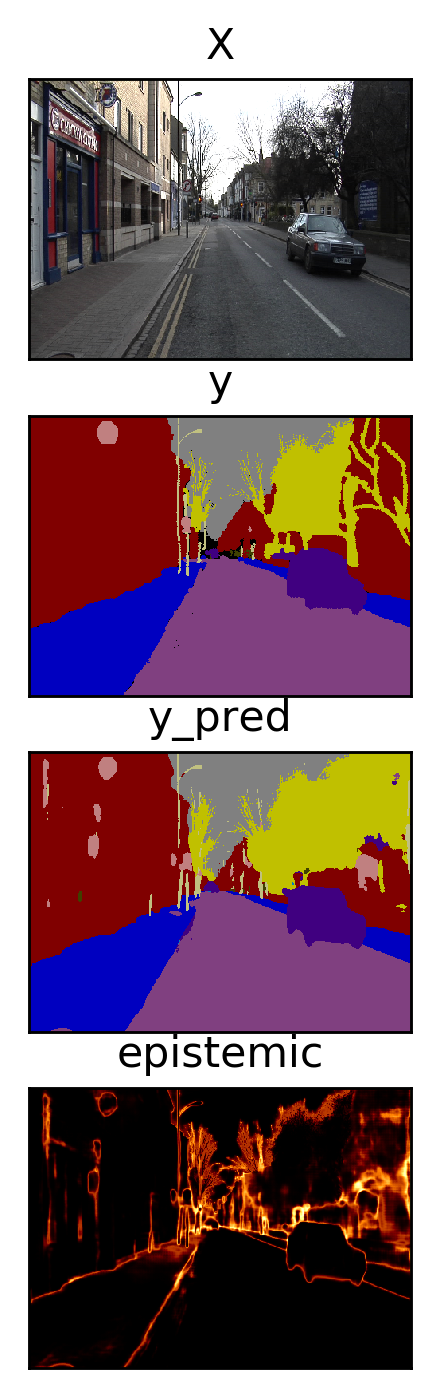

In [19]:
X, y, p, s = predict.predict_epistemic(model, generators['test'], camvid11)
fig = plot.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])
fig.savefig('img/tiramisu-bayesian/epistemic-approx/2.png', transparent=True, bbox_inches='tight')

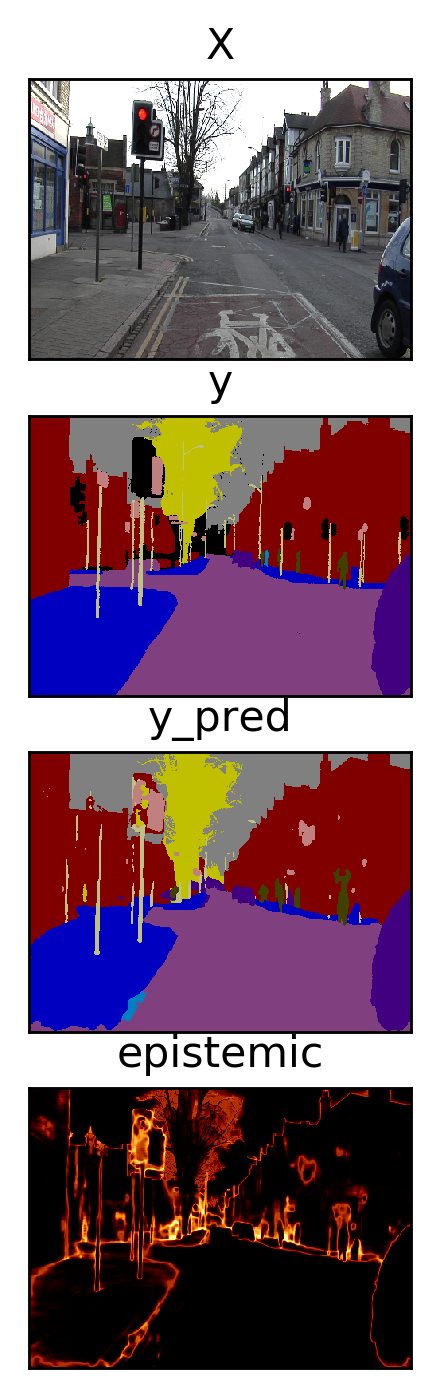

In [20]:
X, y, p, s = predict.predict_epistemic(model, generators['test'], camvid11)
fig = plot.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])
fig.savefig('img/tiramisu-bayesian/epistemic-approx/3.png', transparent=True, bbox_inches='tight')

# Video

In [21]:
video_file = '0005VD.mp4'
video_path = camvid.videos.abs_path(video_file)
out_path = 'img/tiramisu-bayesian/epistemic-approx/{}'.format(video_file)

In [22]:
predict_video.predict_video(video_path, out_path, camvid11, model, predict.predict_epistemic)

100%|██████████| 6600/6600 [20:54<00:00,  5.26it/s]
